# DIGIT PREPROCESSING

## Imports

In [1]:
from PIL                import Image, ImageFilter
from IPython.display    import Image as show
import numpy as np
from IPython.display    import display

## Functions

In [2]:
def preview(img, title = ''):
    pix_path = '/tmp/pix_output.png'
    img.save(pix_path)
    pic = show(filename=pix_path)
    if title != '': print title
    display(pic)

In [3]:
def black_and_white(img, threshold = 128):
    gray = img.convert('L')        # convert the RGB image to grayscale image
    bw = np.asarray(gray).copy()   # read the grayscale image into an array

    bw[bw < threshold]  = 0        # Black
    bw[bw >= threshold] = 255      # White

    img = Image.fromarray(bw)
    return img

In [4]:
def resize(img, x, y, antialias = None):
    img.thumbnail((x, y), antialias) if antialias else img.thumbnail((x, y))
    return img

In [5]:
def gaussian_blur(img, radius):
    img = img.filter(ImageFilter.GaussianBlur(radius))
    return img

In [6]:
def sharpen(img):
    img.filter(ImageFilter.SHARPEN)
    return img

In [7]:
def print_ascii(img):
    arr = np.asarray(img).copy()
    for row in arr:
        line = ''
        for cell in row:
            result = 0
            if cell == 0:
                result = 1
            line = line + str(result)
        print line

In [8]:
def add_frame(img, border_width = 0, pad_with = 255):
    arr = np.asarray(img).copy()
    new_array = np.pad(arr, 4, mode='constant', constant_values=pad_with)
    
    img = Image.fromarray(new_array)
    return img

## Digit image paths

In [9]:
DIGITS_FOLDER = '/home/farmer/raspifarm/resources/images/digits'

digitPathFor = {
    "0": DIGITS_FOLDER + '/digit_0_64x64.jpg',
    "1": DIGITS_FOLDER + '/digit_1_64x64.jpg',
    "2": DIGITS_FOLDER + '/digit_2_64x64.jpg',
    "3": DIGITS_FOLDER + '/digit_3_64x64.jpg',
    "4": DIGITS_FOLDER + '/digit_4_64x64.jpg',
    "5": DIGITS_FOLDER + '/digit_5_64x64.jpg',
    "6": DIGITS_FOLDER + '/digit_6_64x64.jpg',
    "7": DIGITS_FOLDER + '/digit_7_64x64.jpg',
    "8": DIGITS_FOLDER + '/digit_8_64x64.jpg',
    "9": DIGITS_FOLDER + '/digit_9_64x64.jpg'
}

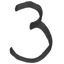

In [11]:
# Example, show a digit
show(digitPathFor['3'])

## Preprocess a digit

original


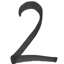

b/w on original


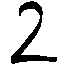

blurred


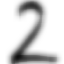

sharpened


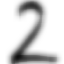

bw on blurred/sharpened


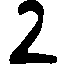

resized


bw on blurred/sharpened/resized


ASCII (20x20)
00000000111100000000
00000011111110000000
00000011111110000000
00000011101111000000
00000010000011000000
00000000000010000000
00000000000010000000
00000000000110000000
00000000000110000000
00000000001110000000
00000000011100000000
00000000111000000000
00000001111000000000
00000001110000000000
00000011100000000000
00000111100000000000
00001111100000000000
00011111111111111000
00011111111111111100
00011111111111111000
with white frame of 4


ASCII (28x28)
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000001111000000000000
0000000000111111100000000000
0000000000111111100000000000
0000000000111011110000000000
0000000000100000110000000000
0000000000000000100000000000
0000000000000000100000000000
0000000000000001100000000000
0000000000000001100000000000
0000000000000011100000000000
0000000000000111000000000000
0000000000001110000000000000
0000000000011110000000000000
0000000000011100000000000000
0000000000111000000000000000
0000000001111000000000000000
0000000011111000000000000000
0000000111111111111110000000
0000000111111111111111000000
0000000111111111111110000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [12]:
input_digit             = digitPathFor['2']
BW_OUTPUT_PATH          = '/tmp/bw_digit.png'
RESIZED_OUTPUT_PATH     = '/tmp/bw_resized_digit.png'

# Open the digit file and print it
digit = Image.open(input_digit)

preview(digit, 'original')

digit = black_and_white(digit, 144)
preview(digit, 'b/w on original')

digit = gaussian_blur(digit, 6)
preview(digit, 'blurred')

digit = sharpen(digit)
preview(digit, 'sharpened')

digit = black_and_white(digit, 192)
preview(digit, 'bw on blurred/sharpened')

digit = resize(digit, 20, 20)
preview(digit, 'resized')

digit = black_and_white(digit, 96)
preview(digit, 'bw on blurred/sharpened/resized')

print 'ASCII (20x20)'
print_ascii(digit)

digit = add_frame(digit)
preview(digit, 'with white frame of 4')

print 'ASCII (28x28)'
print_ascii(digit)



# Take a picture from Picamera

In [102]:
# setup 
import picamera

# configuration
camera = picamera.PiCamera()
camera.resolution = (512,512)

In [103]:
OUTPUT_DIR = '/home/farmer/Images/'

#camera_pic_path  = OUTPUT_DIR + 'digit.jpg'
camera_pic_path  = OUTPUT_DIR + 'digit2.jpg'


camera.capture(camera_pic_path)
camera.close()

Recorded image


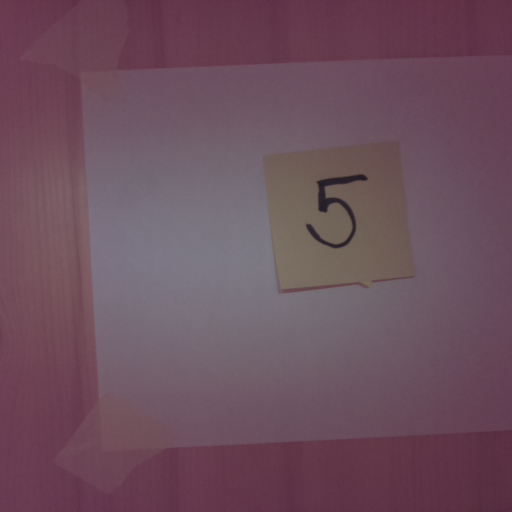

In [104]:
camera_pic = Image.open(camera_pic_path)
preview(camera_pic, 'Recorded image')

Recorded image


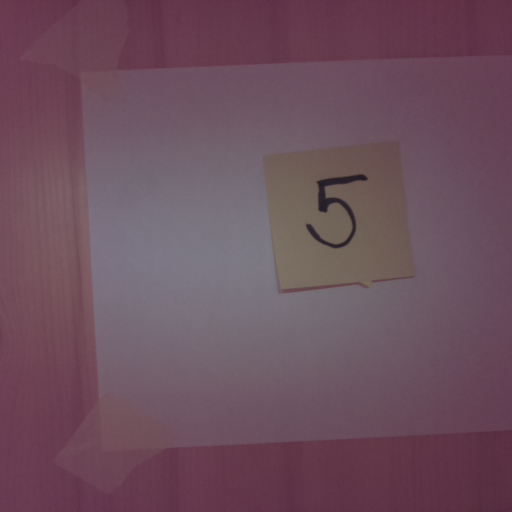

Black and white image


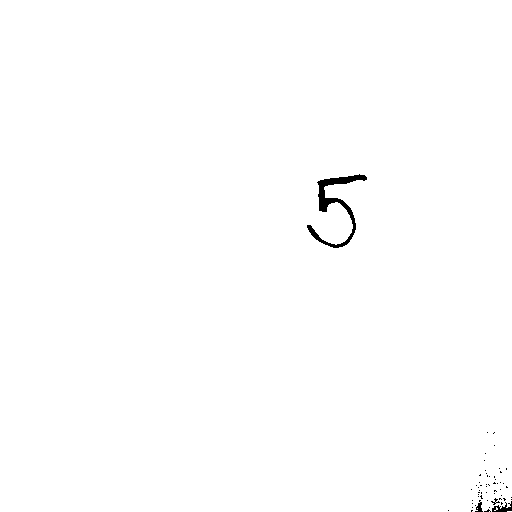

Cropped image


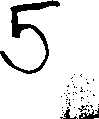

In [105]:
camera_pic = Image.open(camera_pic_path)

preview(camera_pic, 'Recorded image')

camera_pic = black_and_white(camera_pic, 60)
preview(camera_pic, 'Black and white image')

camera_pic = crop_to_minimum(camera_pic)
preview(camera_pic, 'Cropped image')


In [64]:
cp_array = np.asarray(camera_pic)

In [96]:
def crop_to_minimum(bw_image):
    img_array = np.asarray(bw_image).copy()
    img_array = img_array[~np.all(img_array == 255, axis=1)]
    img_array = img_array[:,~np.all(img_array == 255, axis=0)]
    cropped_image = Image.fromarray(img_array)
    return cropped_image
    

In [67]:
def print_array_dimensions(a):
    print "(%s, %s)" % (len(a), len(a[0]))

255
(512, 512)
(97, 512)
(97, 77)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
 255 255 255 255 255]
CROPPED IMAGE?


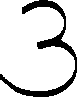

In [84]:
new_array = cp_array.copy()



# new_array[new_array < 1] = True
# new_array[new_array > 1] = False

#       print new_array[256]
#       print np.sum(new_array[256])

# print_array_dimensions(new_array)

# cropped_array = new_array[~np.all(new_array == 0, axis=1)].copy()
cropped_array = new_array[~np.all(new_array == 255, axis=1)].copy()

print_array_dimensions(cropped_array)

#        print cropped_array[0]

cropped_array = cropped_array[:,~np.all(cropped_array == 255, axis=0)].copy()
print_array_dimensions(cropped_array)

# cropped_array[cropped_array == 0] = 255
# cropped_array[cropped_array == 1] = 0

cropped_image = Image.fromarray(cropped_array)

print cropped_array[25]

preview(cropped_image, 'CROPPED IMAGE?')
#another_cropped_array = cropped_array.copy()

#another_cropped_array = another_cropped_array[]